# Riesgo de Default de Préstamos
## Juan Pablo Veliz - Proyecto DS - Coderhouse 

### Entendimiento del Negocio

#### Abstracto

[Link a la Presentación Ejecutiva](https://github.com/JuanPabloVeliz/Coder-DS/blob/main/Entregables/DataStorytelling_Veliz.pdf)

Nos referimos como industria de servicios financieros a la amplia oferta de productos y servicios relacionados con la administración del dinero y sus actividades relacionadas, como seguros, procesamiento de pagos, banca digital y préstamos.
Hay muchas partes interesadas que compiten dentro de la industria, incluidos los emisores de tarjetas de crédito, los bancos tradicionales y, más recientemente, varias empresas nuevas generalmente englobadas bajo el nombre de "fintech", que brindan servicios financieros con un enfoque tecnológico muy fuerte. Estos recién llegados han acelerado la tendencia digitalizadora de la industria, que se adapta mejor a las nuevas preferencias de los consumidores, en particular de los jóvenes a los que les gusta administrar sus finanzas desde casa. En este escenario, todas las instituciones financieras y las empresas emergentes están perfeccionando su tecnología y ampliando los servicios remotos.

Hay tres tipos de servicios financieros: personales, de consumo y corporativos. En este proyecto estaremos enfocando nuestra atención en las finanzas de consumo y especialmente en la industria del crédito.
Las finanzas de consumo están presentes en casi todas las decisiones económicas que las personas toman en su vida, como comprar un automóvil o una casa, pagar la universidad o hacer un viaje en vacaciones. Todas estas experiencias por lo general requieren un gran gasto que se puede acomodar a un conveniente flujo de efectivo en cuotas a lo largo del tiempo tomando préstamos.
En el otro lado de la mesa, los prestamistas se arriesgan en cada operación, ya que incurren en pérdidas cuando los clientes no devuelven sus préstamos a tiempo. Desde su punto de vista, el riesgo es deseable porque es representativo de una oportunidad de ganancia que se captura en la tasa de interés, pero demasiado riesgo podría conducir a mayores índices de incumplimiento generando pérdidas masivas y potencialmente la quiebra.
Es por eso que la predicción de incumplimiento crediticio es fundamental para administrar el riesgo en un negocio de préstamos al consumidor, ya que permite a los prestamistas optimizar las decisiones de préstamo y crear una mejor experiencia para el cliente.

En este proyecto, utilizaré un conjunto de datos creado con fines educativos por MachineHack, que contiene 67.463 filas y 35 columnas de datos, incluidos atributos como el monto financiado, el historial crediticio de los prestatarios y el tipo de préstamo, para predecir si una persona será morosa o no.

#### Problemática del Negocio y Enfoque

El conjunto de datos seleccionado simula datos históricos para un "P2P Lending Club". También conocido como crowdlending, P2P es la práctica de personas o empresas no relacionadas que prestan dinero a través de servicios en línea que conectan a los prestamistas con los prestatarios.
Los mercados de préstamos P2P han crecido exponencialmente en los últimos años, por lo que hay espacio para motores de recomendación capaces de mostrar las mejores opciones tanto para inversores como para prestatarios.

Como se comentó anteriormente, estaré trabajando en la hipótesis de que es posible predecir si un préstamo caerá en mora utilizando antecedentes e información financiera histórica sobre el tomador del préstamo y las condiciones del préstamo.

En el camino, podremos encontrar ideas para algunas preguntas relevantes del tema, tales como: ¿Cuánto influye el comportamiento financiero pasado en el futuro? ¿Cuál es el/los atributo/s del consumidor más relevante a considerar en la gestión de riesgos? ¿Qué tipo de préstamo es más riesgoso? ¿Existe alguna condición particular que tenga mayor relevancia en la morosidad de los préstamos?

### Entendimiento de los Datos

#### Importación de Librerías y Definición del Dataset Inicial

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings

warnings.filterwarnings("ignore")
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv("https://github.com/JuanPabloVeliz/Coder-DS/blob/main/Dataset/train.csv?raw=true")

#### Descripción de los Datos

A continuación se detallan las características generales del dataset:

Significado de las columnas:

0. Loan ID
1. Loan Amount: Monto del préstamo solicitado.
2. Funded Amount: Monto del préstamo menos cargos prepagos.
3. Funded Amount Investor: en los préstamos P2P, el monto total ofrecido por todos los inversores.
4. Term: Cantidad de tiempo para pagar el préstamo.
5. Batch Enrolled: ID del grupo en el que se registró el préstamo.
6. Interest Rate: Tasa de interés aplicado al préstamo.
7. Grade: Clasificación sociodemográfica, donde A se refiere a mayores ingresos.
8. Sub Grade: Sub-clasificación de Grado (generalmente Grado final ajustado por monto de préstamo y vencimiento de acuerdo a las reglas del mercado P2P).
9. Employment Duration: se refiere a la experiencia laboral del prestatario en el tiempo.
10. Home Ownership: Tipo de tenencia de la vivienda.
11. Verification Status: Indica si la información del prestatario ha sido verificada.
12. Payment Plan: Se refiere al acto de hacer pagos iguales de una cantidad predefinida en una frecuencia predefinida.
13. Loan Title: Describe el propósito del préstamo.
14. Debit to Income: Razón = monto de pagos de deuda comprometida / ingreso.
15. Delinquency - two years: Veces que el prestatario ha dejado de pagar su deuda a tiempo en los últimos 2 años.
16. Inquires - six months: Veces que el prestatario ha sido consultado (buscado) en una base de datos financiera pública.
17. Open Account: Número de líneas de crédito abiertas en el expediente crediticio del prestatario.
18. Public Record: Número de morosidades por las cuales se han emprendido acciones judiciales por parte de un acreedor.
19. Revolving Balance: La cantidad que el titular de la cuenta toma prestada contra una línea de crédito
20. Revolving Utilities: Razón = Saldo Revolvente / Línea de Crédito Total. No aplicable a préstamos a plazos.
21. Total Accounts: Número total de Cuentas en el expediente de crédito del acreditado.
22. Initial List Status: IIndica si el préstamo debe ser fondeado en su totalidad (w) o permite ser fondeado parcialmente (f) por los inversionistas.
23. Total Received Interest: Cantidad de intereses que se ha pagado por el préstamo actual.
24. Total Received Late Fee: Cantidad de cargos por pago atrasado que se ha pagado por el préstamo actual.
25. Recoveries: Cantidad que ha sido cobrada con servicios de cobranza de terceros.
26. Collection Recovery Fee: Tarifas aplicadas a las recuperaciones.
27. Collection 12 months Medical: Indica si algún solicitante tiene facturas médicas impagas por al menos 12 meses.
28. Application Type: Indica si la solicitud es individual (1 solicitante) o conjunta (2 o más solicitantes).
29. Last week Pay: Monto del pago del préstamo realizado durante la última semana.
30. Accounts Delinquent: Número de cuentas morosas en el expediente crediticio del prestatario.
31. Total Collection Amount: La acumulación de créditos adeudados por el prestatario.
32. Total Current Balance: el monto actual de todos los cargos, incluidas las tarifas, los intereses, las multas y los créditos.
33. Total Revolving Credit Limit: Límite de línea de crédito asignado.
34. Loan Status: Indica si el préstamo está en mora.

In [2]:
df.head()

ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0  65087372        10000          32236                12329.36    59   
1   1450153         3609          11940                12192.00    59   
2   1969101        28276           9311                21603.22    59   
3   6651430        11170           6954                17877.16    59   
4  14354669        16890          13226                13539.93    59   

  Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  \
0     BAT2522922          11.14     B        C4            MORTGAGE   
1     BAT1586599          12.24     C        D3                RENT   
2     BAT2136391          12.55     F        D4            MORTGAGE   
3     BAT2428731          16.73     C        C3            MORTGAGE   
4     BAT5341619          15.01     C        D4            MORTGAGE   

   Home Ownership Verification Status Payment Plan               Loan Title  \
0       176346.63        Not Verified            n       Debt Consolidation   
1        39833.92     Source Verified            n       Debt consolidation   
2        91506.69     Source Verified            n       Debt Consolidation   
3       108286.58     Source Verified            n       Debt consolidation   
4        44234.83     Source Verified            n  Credit card refinancing   

   Debit to Income  Delinquency - two years  Inquires - six months  \
0            16.28                        1                      0   
1            15.41                        0                      0   
2            28.14                        0                      0   
3            18.04                        1                      0   
4            17.21                        1                      3   

   Open Account  Public Record  Revolving Balance  Revolving Utilities  \
0            13              0              24246                74.93   
1            12              0                812                78.30   
2            14              0               1843                 2.07   
3             7              0              13819                67.47   
4            13              1               1544                85.25   

   Total Accounts Initial List Status  Total Received Interest  \
0               7                   w                  2929.65   
1              13                   f                   772.77   
2              20                   w                   863.32   
3              12                   w                   288.17   
4              22                   w                   129.24   

   Total Received Late Fee  Recoveries  Collection Recovery Fee  \
0                     0.10        2.50                     0.79   
1                     0.04        2.38                     0.97   
2                    18.78        4.32                     1.02   
3                     0.04        0.11                     0.75   
4                    19.31     1294.82                     0.37   

   Collection 12 months Medical Application Type  Last week Pay  \
0                             0       INDIVIDUAL             49   
1                             0       INDIVIDUAL            109   
2                             0       INDIVIDUAL             66   
3                             0       INDIVIDUAL             39   
4                             0       INDIVIDUAL             18   

   Accounts Delinquent  Total Collection Amount  Total Current Balance  \
0                    0                       31                 311301   
1                    0                       53                 182610   
2                    0                       34                  89801   
3                    0                       40                   9189   
4                    0                      430                 126029   

   Total Revolving Credit Limit  Loan Status  
0                          6619            0  
1                         20885            0  
2            

In [3]:
df.shape

(67463, 35)

In [4]:
df.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64


In [5]:
df.select_dtypes(include="object").nunique().sort_values()

Payment Plan             1
Initial List Status      2
Application Type         2
Employment Duration      3
Verification Status      3
Grade                    7
Sub Grade               35
Batch Enrolled          41
Loan Title             109
dtype: int64

In [6]:
df.select_dtypes(include="number").nunique().sort_values()

Accounts Delinquent                 1
Loan Status                         2
Collection 12 months Medical        2
Term                                3
Public Record                       5
Inquires - six months               6
Delinquency - two years             9
Open Account                       36
Total Accounts                     69
Last week Pay                     162
Total Collection Amount          2193
Revolving Balance               20582
Funded Amount                   24548
Loan Amount                     27525
Total Revolving Credit Limit    37708
Total Current Balance           60901
Collection Recovery Fee         67313
Total Received Late Fee         67380
Recoveries                      67387
Funded Amount Investor          67441
Interest Rate                   67448
Total Received Interest         67451
Home Ownership                  67454
Debit to Income                 67454
Revolving Utilities             67458
ID                              67463
dtype: int64

In [7]:
df.describe()

ID  Loan Amount  Funded Amount  Funded Amount Investor  \
count    67463.00     67463.00       67463.00                67463.00   
mean  25627607.75     16848.90       15770.60                14621.80   
std   21091554.02      8367.87        8150.99                 6785.35   
min    1297933.00      1014.00        1014.00                 1114.59   
25%    6570288.00     10012.00        9266.50                 9831.68   
50%   17915646.00     16073.00       13042.00                12793.68   
75%   42715208.50     22106.00       21793.00                17807.59   
max   72245779.00     35000.00       34999.00                34999.75   

          Term  Interest Rate  Home Ownership  Debit to Income  \
count 67463.00       67463.00        67463.00         67463.00   
mean     58.17          11.85        80541.50            23.30   
std       3.33           3.72        45029.12             8.45   
min      36.00           5.32        14573.54             0.68   
25%      58.00           9.30        51689.84            16.76   
50%      59.00          11.38        69335.83            22.66   
75%      59.00          14.19        94623.32            30.05   
max      59.00          27.18       406561.54            39.63   

       Delinquency - two years  Inquires - six months  Open Account  \
count                 67463.00               67463.00      67463.00   
mean                      0.33                   0.15         14.27   
std                       0.80                   0.47          6.23   
min                       0.00                   0.00          2.00   
25%                       0.00                   0.00         10.00   
50%                       0.00                   0.00         13.00   
75%                       0.00                   0.00         16.00   
max                       8.00                   5.00         37.00   

       Public Record  Revolving Balance  Revolving Utilities  Total Accounts  \
count       67463.00           67463.00             67463.00        67463.00   
mean            0.08            7699.34                52.89           18.63   
std             0.35            7836.15                22.54            8.32   
min             0.00               0.00                 0.01            4.00   
25%             0.00            2557.00                38.66           13.00   
50%             0.00            5516.00                54.08           18.00   
75%             0.00           10184.50                69.18           23.00   
max             4.00          116933.00               100.88           72.00   

       Total Received Interest  Total Received Late Fee  Recoveries  \
count                 67463.00                 67463.00    67463.00   
mean                   2068.99                     1.14       59.69   
std                    2221.92                     5.24      357.03   
min                       4.74                     0.00        0.00   
25%                     570.90                     0.02        1.63   
50%                    1330.84                     0.04        3.34   
75%                    2656.96                     0.07        5.45   
max                   14301.37                    42.62     4354.47   

       Collection Recovery Fee  Collection 12 months Medical  Last week Pay  \
count                 67463.00                      67463.00       67463.00   
mean                      1.13                          0.02          71.16   
std                       3.49                          0.14          43.32   
min                       0.00                          0.00           0.00   
25%                       0.48                          0.00          35.00   
50%                       0.78                          0.00          68.00   
75%                       1.07                          0.00         105.00   
max                     166.83                          1.00         161.00   

       Accounts Delinquent  Total Collection Amou

#### Primera limpieza
Del análisis anterior, se desprende que:
* La columna el ID no es nesesaria y se eliminará.
* Las columnas "Accounts Delinquent" y "Payment Plan" tienen valores únicos a lo largo del dataset, por lo tanto no van a aportar información significativa y se eliminarán.
* La columna "Home Ownership" tiene un valor que no se puede identificar a qué corresponde. Se renombrará.
* La columna "Employment Duration" contiene los valores correspondientes a "Home Ownership". Se renombrará.
* Entre las variables categóricas, la columna "Loan Title" tiene una cardinalidad muy alta. Se reducirá.


In [8]:
df.drop(["ID", "Payment Plan", "Accounts Delinquent"], inplace=True, axis=1)

df.rename(columns={"Home Ownership": "Unknown Value", "Employment Duration": "Home Ownership"}, inplace=True)

loan_titles = ["Consolidation", "Refinancing"]
df.loc[df["Loan Title"].str.contains(loan_titles[0], case=False), "Loan Title"] = loan_titles[0]
df.loc[df["Loan Title"].str.contains(loan_titles[1], case=False), "Loan Title"] = loan_titles[1]
df.loc[~df["Loan Title"].str.contains('|'.join(loan_titles), case=False), "Loan Title"] = "Other"

A continuación se visualiza el encabezado del dataframe luego de la primera limpieza.

In [9]:
df.head()

Loan Amount  Funded Amount  Funded Amount Investor  Term Batch Enrolled  \
0        10000          32236                12329.36    59     BAT2522922   
1         3609          11940                12192.00    59     BAT1586599   
2        28276           9311                21603.22    59     BAT2136391   
3        11170           6954                17877.16    59     BAT2428731   
4        16890          13226                13539.93    59     BAT5341619   

   Interest Rate Grade Sub Grade Home Ownership  Unknown Value  \
0          11.14     B        C4       MORTGAGE      176346.63   
1          12.24     C        D3           RENT       39833.92   
2          12.55     F        D4       MORTGAGE       91506.69   
3          16.73     C        C3       MORTGAGE      108286.58   
4          15.01     C        D4       MORTGAGE       44234.83   

  Verification Status     Loan Title  Debit to Income  \
0        Not Verified  Consolidation            16.28   
1     Source Verified  Consolidation            15.41   
2     Source Verified  Consolidation            28.14   
3     Source Verified  Consolidation            18.04   
4     Source Verified    Refinancing            17.21   

   Delinquency - two years  Inquires - six months  Open Account  \
0                        1                      0            13   
1                        0                      0            12   
2                        0                      0            14   
3                        1                      0             7   
4                        1                      3            13   

   Public Record  Revolving Balance  Revolving Utilities  Total Accounts  \
0              0              24246                74.93               7   
1              0                812                78.30              13   
2              0               1843                 2.07              20   
3              0              13819                67.47              12   
4              1               1544                85.25              22   

  Initial List Status  Total Received Interest  Total Received Late Fee  \
0                   w                  2929.65                     0.10   
1                   f                   772.77                     0.04   
2                   w                   863.32                    18.78   
3                   w                   288.17                     0.04   
4                   w                   129.24                    19.31   

   Recoveries  Collection Recovery Fee  Collection 12 months Medical  \
0        2.50                     0.79                             0   
1        2.38                     0.97                             0   
2        4.32                     1.02                             0   
3        0.11                     0.75                             0   
4     1294.82                     0.37                             0   

  Application Type  Last week Pay  Total Collection Amount  \
0       INDIVIDUAL             49                       31   
1       INDIVIDUAL            109                       53   
2       INDIVIDUAL             66                       34   
3       INDIVIDUAL             39                       40   
4       INDIVIDUAL             18                      430   

   Total Current Balance  Total Revolving Credit Limit  Loan Status  
0                 311301                          6619            0  
1                 182610                         20885            0  
2                  89801                         26155            0  
3                   9189                         60214            0  
4                 126029                         22579            0

#### Determinación de la variable de interés y análisis univariado
La variable a predecir será la columna "Loan Status", que toma los valores:
* 0 = Préstamo devuelto
* 1 = Préstamo en default

In [10]:
df["Loan Status"].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

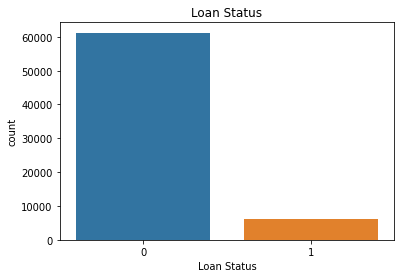

In [11]:
g= sns.countplot(df["Loan Status"]).set(title="Loan Status")


#### Evaluación y procesamiento de valores nulos

Como se ve a continuación, no existen en el dataset valores nulos:

In [12]:
df.isnull().sum()

Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Home Ownership                  0
Unknown Value                   0
Verification Status             0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay                   0
Total Collection Amount         0
Total Current 

In [13]:
df.isna().sum()

Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Home Ownership                  0
Unknown Value                   0
Verification Status             0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay                   0
Total Collection Amount         0
Total Current 

#### Análisis univariados del resto de las variables
Se adjunta un reporte de pandas profiling con el análisis univariado de cada una de las columnas: [Pre Processed Profiling](https://rawcdn.githack.com/JuanPabloVeliz/Coder-DS/2a50ed123fc79993f443954cee8627644447eed7/Entregables/profiling-pre.html)

In [14]:
prof = ProfileReport(df, minimal=True)
prof.to_file(output_file='profiling-pre.html')

#### Evaluación y procesamiento de valores atípicos

Como resultado de los análisis univariados, sólo se encuentran valores atípico en la columna "Collection Recovery Fees".

<AxesSubplot:xlabel='Collection Recovery Fee', ylabel='Count'>

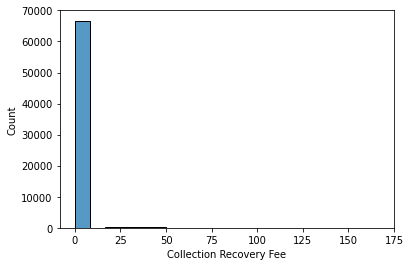

In [15]:
sns.histplot(df["Collection Recovery Fee"], bins=20)

In [16]:
df["Collection Recovery Fee"].describe()

count   67463.00
mean        1.13
std         3.49
min         0.00
25%         0.48
50%         0.78
75%         1.07
max       166.83
Name: Collection Recovery Fee, dtype: float64

In [17]:
df.corrwith(df["Collection Recovery Fee"]).abs().sort_values(ascending=False)

Collection Recovery Fee        1.00
Inquires - six months          0.01
Recoveries                     0.01
Total Accounts                 0.01
Collection 12 months Medical   0.01
Funded Amount Investor         0.01
Open Account                   0.01
Total Received Late Fee        0.00
Public Record                  0.00
Revolving Balance              0.00
Total Received Interest        0.00
Loan Status                    0.00
Unknown Value                  0.00
Total Current Balance          0.00
Delinquency - two years        0.00
Debit to Income                0.00
Loan Amount                    0.00
Revolving Utilities            0.00
Total Collection Amount        0.00
Interest Rate                  0.00
Term                           0.00
Last week Pay                  0.00
Total Revolving Credit Limit   0.00
Funded Amount                  0.00
dtype: float64

In [18]:
fee_mean = df["Collection Recovery Fee"].mean()
outliers = df["Collection Recovery Fee"] > 2
df.loc[outliers, "Collection Recovery Fee"] = np.nan
df["Collection Recovery Fee"].fillna(fee_mean, inplace= True)

In [19]:
df["Collection Recovery Fee"].describe()

count   67463.00
mean        0.77
std         0.38
min         0.00
25%         0.48
50%         0.78
75%         1.07
max         1.83
Name: Collection Recovery Fee, dtype: float64

Se reemplazaron los valores atípicos por un valor representativo de la tendencia central, y ahora los resultados del describe son más razonables.

#### EDA - Exploración de Datos

Luego de la limpieza inicial, comencemos la fase de exploración de los datos

##### Análisis Multivariado
Para poder observar las correlaciones entre las variables del dataset, primero voy a convertir las categóricas en numéricas.

In [20]:
#labels = lista de diccionarios con los nombres de las categorías convertidas para referencia futura
labels = []

#creo un nuevo dataframe numérico
ndf = df.copy()

#ordinals = columnas ordinales que se cambian por numéricas
ordinals = [
ndf["Grade"],
ndf["Sub Grade"],
ndf["Batch Enrolled"]
]

for i in ordinals:
    labels.append({i.name:dict(enumerate(i.sort_values().unique()))})
    ndf[i.name] = pd.factorize(df[i.name].sort_values()) [0]

#para el resto de las variables, obtengo las dummies
ndf = pd.get_dummies(ndf)

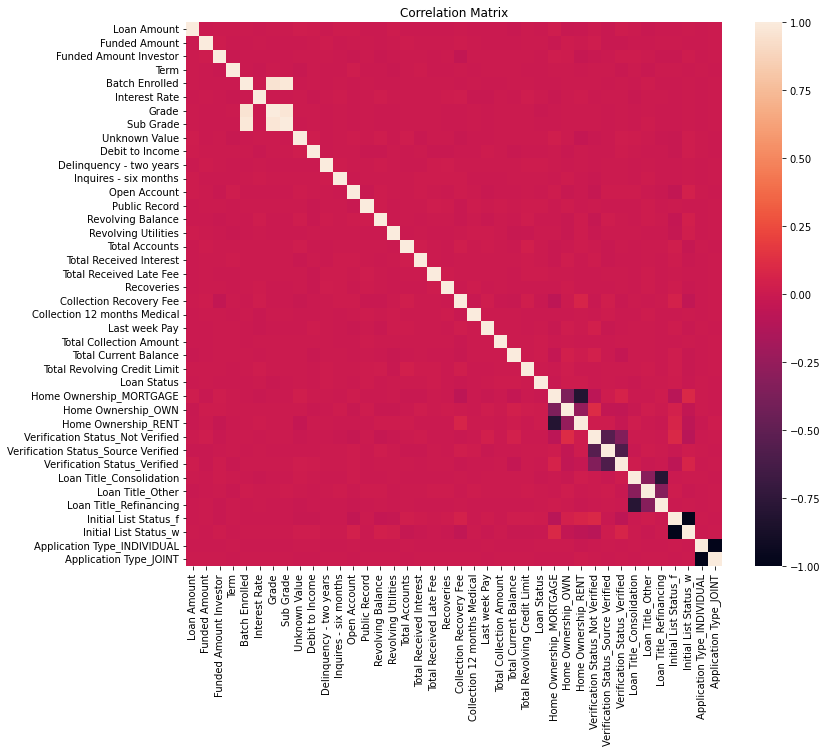

In [21]:
plt.figure(figsize=(12,10))
g = sns.heatmap(ndf.corr(), xticklabels=ndf.columns, yticklabels=ndf.columns).set(title="Correlation Matrix")

Como se esperaba, existe la correlación positiva entre las variables "Grade" y "Sub Grade". Sorprendentemente también existe una fuerte correlación positiva de la variable "Batch Enrolled" con "Grade" y "Sub Grade".

Respecto a las nuevas variables dummies, como es esperable aparecen correlaciones negativas entre aquellas que pertenecen a la misma categoría original. También aparecen leves correlaciones con las variables originales que puede ser conveniente investigar con mayor profundidad.

#### Análisis Bivariados

Para poder realizar los análisis bivariados, primero voy a separar en 2 dataframes distintos, quedando así las variables categóricas por un lado las numéricas por otro, conservando la variable de interés en ambos dataframes.

In [22]:
num_columns = ["Loan Amount", 
    "Funded Amount", 
    "Funded Amount Investor", 
    "Batch Enrolled", 
    "Interest Rate", 
    "Grade",
    "Sub Grade",
    "Unknown Value",
    "Debit to Income",
    "Open Account",
    "Revolving Balance",
    "Revolving Utilities",
    "Total Accounts",
    "Total Received Interest",
    "Total Received Late Fee",
    "Recoveries",
    "Collection Recovery Fee",
    "Last week Pay",
    "Total Collection Amount",
    "Total Current Balance",
    "Total Revolving Credit Limit",
    "Loan Status"]

num_df = ndf[num_columns]
print("Cantidad de Columnas en num_df: ", len(num_df.columns))
print("Columnas en num_df: ", num_df.columns)


num_columns.remove("Loan Status")

cat_df = ndf.drop(num_columns, axis=1)
print("Cantidad de Columnas en cat_df: ", len(cat_df.columns))
print("Columnas en cat_df: ", cat_df.columns)


Cantidad de Columnas en num_df:  22
Columnas en num_df:  Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Unknown Value', 'Debit to Income', 'Open Account', 'Revolving Balance',
       'Revolving Utilities', 'Total Accounts', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Last week Pay', 'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')
Cantidad de Columnas en cat_df:  19
Columnas en cat_df:  Index(['Term', 'Delinquency - two years', 'Inquires - six months',
       'Public Record', 'Collection 12 months Medical', 'Loan Status',
       'Home Ownership_MORTGAGE', 'Home Ownership_OWN', 'Home Ownership_RENT',
       'Verification Status_Not Verified',
       'Verification Status_Source Verified', 'Verification Status_Verified',
       'Loan Title_Consolidation', '

##### Análisis de las variables numéricas respecto a la variable de interés:

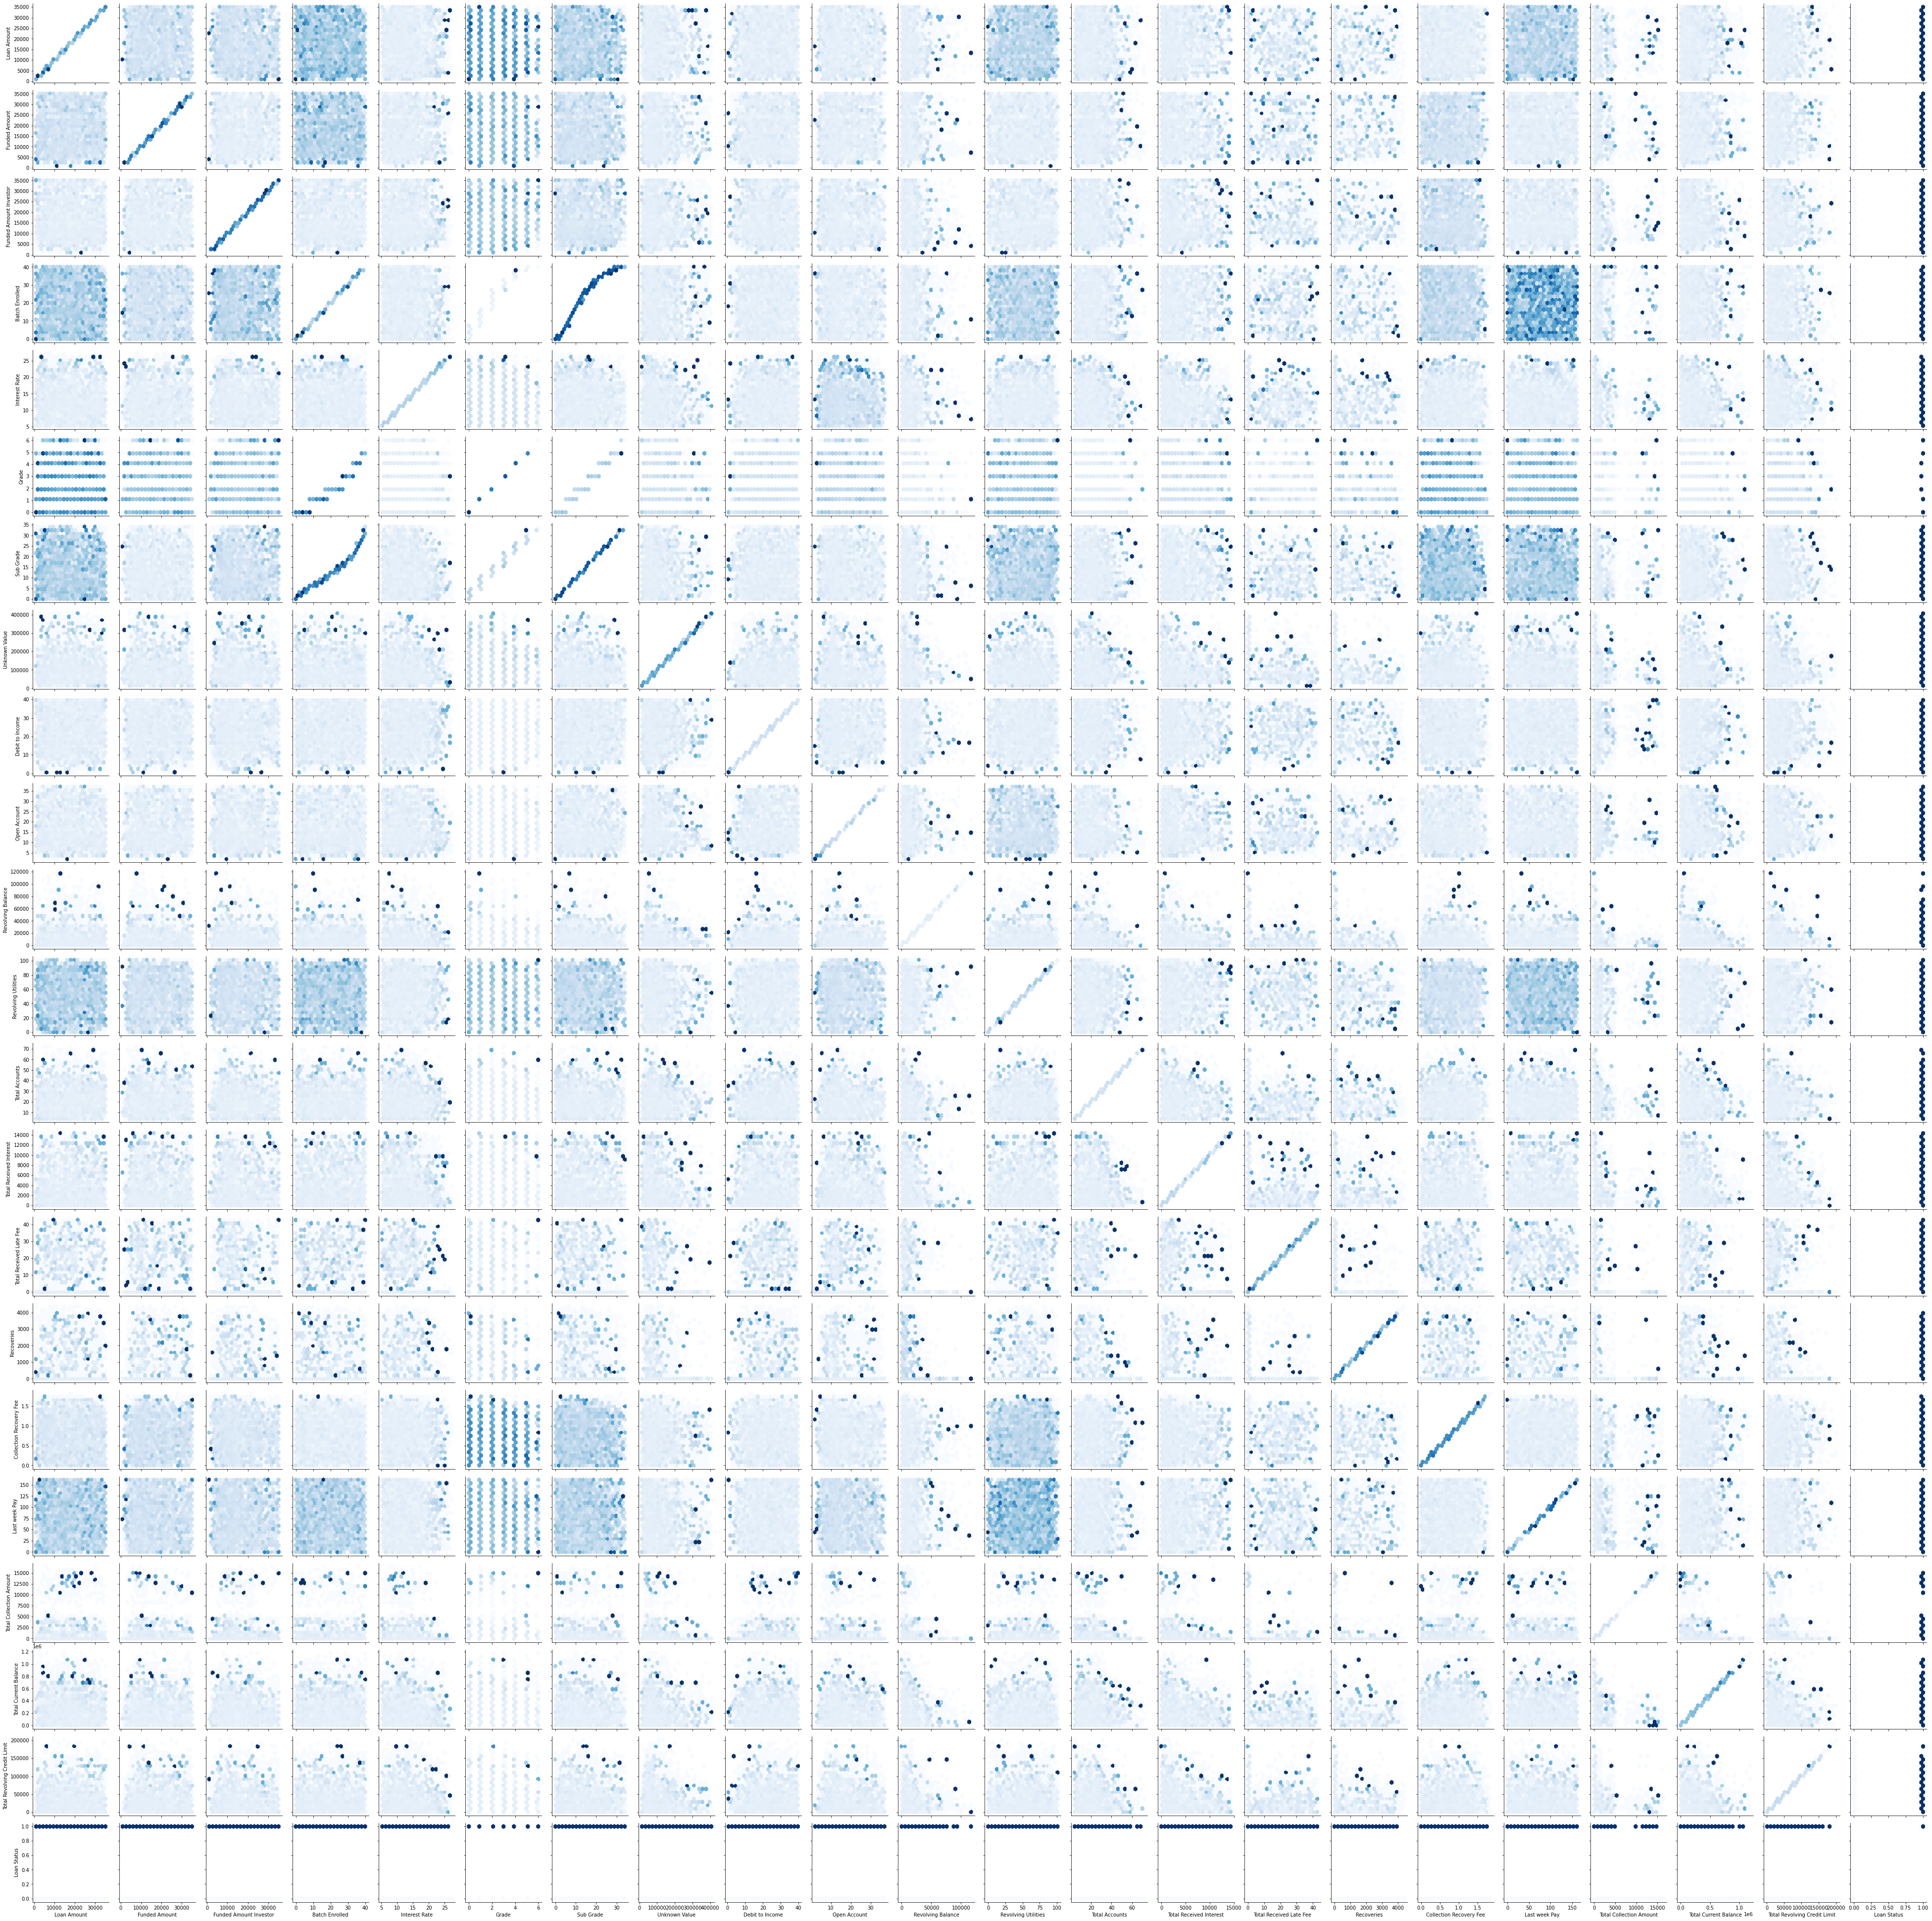

In [23]:
def hexbin(x, y, color, **kwargs):
    plt.hexbin(x, y, C=num_df["Loan Status"], gridsize=20, cmap="Blues")

g = sns.PairGrid(num_df)
g.map(hexbin)

La grilla muestra la concentración de préstamos defaulteados en relación con cada par de variables numéricas del dataset.
Un repaso nos permite extraer algunos insights:
* "Loan Amount": Concentra mayor proporción de default en los montos pequeños.
* "Interest Rate": La tasa de interés, cuanto mayor, tiende a aumentar la probabilidad de default, pero no en todos los casos. Pierde su relevancia al analizarla junto con "Revolving Balance", "Total Accounts", "Total Received Interest", "Total Collection Amount", "Total Current Balance" y "Total Revolving Credit Limit".
* "Revolving Balance": Concentra mayor proporción de default en los montos altos.
* "Revolving Utilities": la mayor porporción de default tienden a estar en los valores más pequeños y los más altos, la proporción en menor en los valores medios. Se distibuye casi homogéneamente por todo el espectro cuando se la analiza junto con "Loan Amount, "Batch Enrolled" y "Last Week Pay".
* "Total Collection Amount": Concentra mayor proporción de default en los montos altos y luego en los montos bajos. Baja considerablmente la concentración en los montos medios.

##### Análisis de las variables categóricas respecto a la variable de interés:

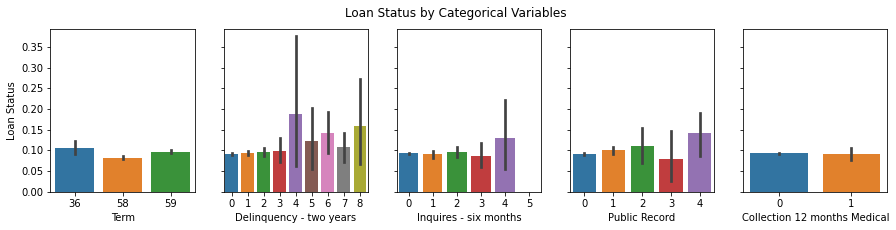

In [24]:
fig, axs = plt.subplots(ncols=5, figsize=(15,3), sharey=True)
fig.suptitle("Loan Status by Categorical Variables")

pos = 0
for col in cat_df.columns[:5]:
    sns.barplot(y=cat_df["Loan Status"], x=cat_df[col], ax=axs[pos])

    if pos > 0:
        axs[pos].set(ylabel=None)

    pos += 1

Observando el comportamiento de la variable objetivo (Loan Status), de acuerdo a un conjunto de variables categóricas encontramos estos insights:
* Los tomadores que tienen 4, 8 y 6 informes de "Delinquency" en los últimos 2 años tienen mayor tendencia hacia el default.
* Los tomadores que tienen 4 "Inquires" en los últimos 6 meses sonmás propensos a defaultear.
* Los tomadores que tienen 4 "Public records" son más propensos a defaultear. 
* El plazo del préstamo y las facturas médica impagas no infieren de manera relevante en la probabilidad de defaultear.


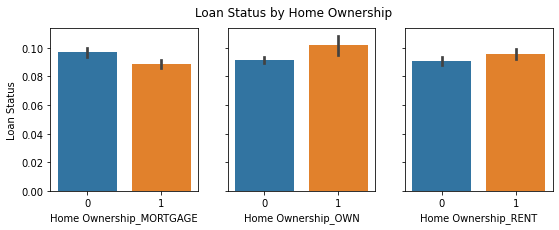

In [25]:
fig, axs = plt.subplots(ncols=3, figsize=(9,3), sharey=True)
fig.suptitle("Loan Status by Home Ownership")

pos = 0
for col in [col for col in cat_df.columns if "Home Ownership" in col]:
    if col != "Loan Status":
        sns.barplot(y=cat_df["Loan Status"], x=cat_df[col], ax=axs[pos])
        if pos > 0:
            axs[pos].set(ylabel=None)
        pos += 1
    
    

Analizando la variable "Home Ownership" frente a la variable objetivo, se observa que los dueños de sus viviendas tienen una tendencia a defaultear apenas por encima de aquellos que tienen hipoteca o alquilan. No parece ser una variable muy relevante.

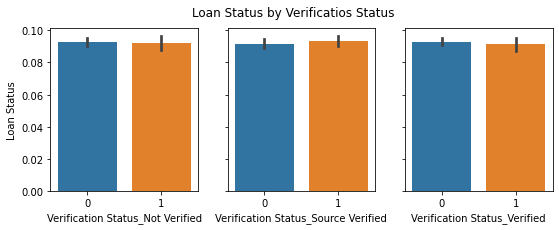

In [26]:
fig, axs = plt.subplots(ncols=3, figsize=(9,3), sharey=True)
fig.suptitle("Loan Status by Verificatios Status")

pos = 0
for col in [col for col in cat_df.columns if "Verification" in col]:
    if col != "Loan Status":
        sns.barplot(y=cat_df["Loan Status"], x=cat_df[col], ax=axs[pos])
        if pos > 0:
            axs[pos].set(ylabel=None)
        pos += 1

Analizando los posibles estados de la variable "Verification Status" frente a la variable objetivo no se observan diferencias significativas.

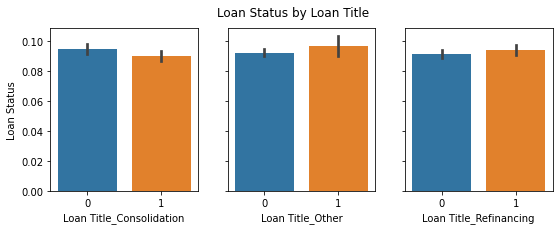

In [27]:
fig, axs = plt.subplots(ncols=3, figsize=(9,3), sharey=True)
fig.suptitle("Loan Status by Loan Title")

pos = 0
for col in [col for col in cat_df.columns if "Title" in col]:
    if col != "Loan Status":
        sns.barplot(y=cat_df["Loan Status"], x=cat_df[col], ax=axs[pos])
        if pos > 0:
            axs[pos].set(ylabel=None)
        pos += 1

Analizando la variable "Loan Title" frente a la variable objetivo no se observan diferencias significativas.

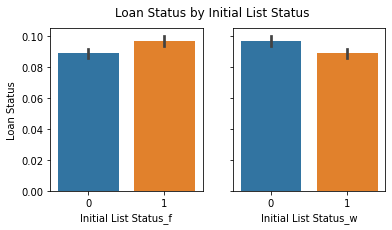

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(6,3), sharey=True)
fig.suptitle("Loan Status by Initial List Status")

pos = 0
for col in [col for col in cat_df.columns if "Initial" in col]:
    if col != "Loan Status":
        sns.barplot(y=cat_df["Loan Status"], x=cat_df[col], ax=axs[pos])
        if pos > 0:
            axs[pos].set(ylabel=None)
        pos += 1

Analizando la variable "Initial list status", se observa que los préstamos que son listados para poder ser fondeados parcialmente tiene una tendencia apenas mayor a ser defaulteados que los que se setean para ser fondeados en su totalidad.

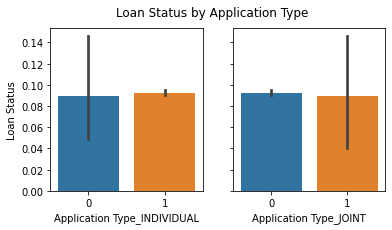

In [29]:
fig, axs = plt.subplots(ncols=2, figsize=(6,3), sharey=True)
fig.suptitle("Loan Status by Application Type")

pos = 0
for col in [col for col in cat_df.columns if "Application" in col]:
    if col != "Loan Status":
        sns.barplot(y=cat_df["Loan Status"], x=cat_df[col], ax=axs[pos])
        if pos > 0:
            axs[pos].set(ylabel=None)
        pos += 1

Por último, observando la variable "Application type" no se encuentras diferencias significaticas en la media. Sin embargo, es llamativo que en el caso de las aplicaciones conjuntas la dispersión es muy alta.

### Modelado

#### Selección de variables
Como primera medida sólo voy a tomar las variables numéricas y descartar las redundantes "Batch Enrolled" y "Grade" que en el análisis multivariado vimos que tenían altísima correlación.

In [30]:
clean_numdf = num_df.select_dtypes("number").copy()
clean_numdf.drop(["Batch Enrolled","Grade",], axis=1, inplace=True)

In [31]:
clean_numdf.shape

(67463, 20)

#### Selección del algoritmo

Como primera prueba voy a utilizar el Decision Tree Clasifier con sus valores por defecto y hacer la posterior evaluación.

In [32]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [33]:
# Cargar los datos
X = clean_numdf.drop(["Loan Status"], axis=1)
y = clean_numdf["Loan Status"]

# Separacion train/test
X_train, X_test, y_train, y_test = train_test_split(X, y)

print("Resumen del resultado de la separación:")
print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de pruebas:", X_test.shape)

print("Porcentaje de Trues en set de entrenamiento:", "{:.2%}".format(y_train.sum()/len(y_train)))
print("Porcentaje de Trues en set de pryeba:", "{:.2%}".format(y_test.sum()/len(y_test)))

print("Balance de Trues en la variable objetivo:")
print(y.value_counts())

Resumen del resultado de la separación:
Tamaño del set de entrenamiento: (50597, 19)
Tamaño del set de pruebas: (16866, 19)
Porcentaje de Trues en set de entrenamiento: 9.34%
Porcentaje de Trues en set de pryeba: 8.99%
Balance de Trues en la variable objetivo:
0    61222
1     6241
Name: Loan Status, dtype: int64


In [34]:
# Decision Tree

#Paso 1 :Instanciar
clf = DecisionTreeClassifier(random_state=0, class_weight="balanced")

#Paso 2 : Fit con la información
model = clf.fit(X_train, y_train)

#Paso 3 : Predicción
dt_pred = model.predict(X_test)

print("Parámetros utilizados")
clf.get_params()

Parámetros utilizados


{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [35]:
def cf_matrix(pred):
    cf_matrix = confusion_matrix(y_test, pred)
    ax = sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
    ax.set_title('Matriz de confusion con labels')
    ax.set_xlabel('Valores predichos')
    ax.set_ylabel('Valores reales')
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()

def metrics(pred):
    print("Accuracy (tp + tn / Total): ","{:.2%}".format(accuracy_score(y_test, pred)), " Etiquetados correctamente")
    print("Precision Score (tp / (tp + fp)): ","{:.2%}".format(precision_score(y_test, pred, average="binary")), " Predicciones positivas acertadas")
    print("Recall Score (tp / (tp + fn)): ","{:.2%}".format(recall_score(y_test, pred, average="binary")), " Casos positivos detectados")
    print("F1-Score (2 * (precision * recall ) / (precision + recall)): ","{:.2%}".format(f1_score(y_test, pred, average="binary")), " Media armónica entre Precision y Recall")



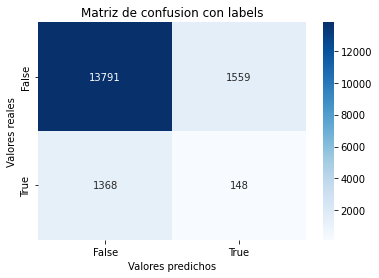

Accuracy (tp + tn / Total):  82.65%  Etiquetados correctamente
Precision Score (tp / (tp + fp)):  8.67%  Predicciones positivas acertadas
Recall Score (tp / (tp + fn)):  9.76%  Casos positivos detectados
F1-Score (2 * (precision * recall ) / (precision + recall)):  9.18%  Media armónica entre Precision y Recall


In [36]:
cf_matrix(dt_pred)
metrics(dt_pred)


In [37]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     15350
           1       0.09      0.10      0.09      1516

    accuracy                           0.83     16866
   macro avg       0.50      0.50      0.50     16866
weighted avg       0.84      0.83      0.83     16866



In [38]:
df_importancias = pd.DataFrame({"Variable": X_train.columns.values.tolist(), "Importancia": clf.feature_importances_}).sort_values(by="Importancia", ascending=False)
df_importancias

Variable  Importancia
5                  Unknown Value         0.06
17         Total Current Balance         0.06
15                 Last week Pay         0.06
11       Total Received Interest         0.06
8              Revolving Balance         0.06
13                    Recoveries         0.06
3                  Interest Rate         0.06
14       Collection Recovery Fee         0.06
1                  Funded Amount         0.06
12       Total Received Late Fee         0.05
2         Funded Amount Investor         0.05
0                    Loan Amount         0.05
9            Revolving Utilities         0.05
18  Total Revolving Credit Limit         0.05
6                Debit to Income         0.05
16       Total Collection Amount         0.04
4                      Sub Grade         0.04
7                   Open Account         0.03
10                Total Accounts         0.03

#### Conclusiones

El modelo actual, es capaz de etiquetar correctamente aproximadamente el 80% de los casos, pero tiene muy baja especificidad y sensibilidad. Esto implica que es incapaz de detectar la mayoría de los casos de default y además genera muchísimos falsos positivos.
En línea con los insights obtenidos en la fase de exploración, no hay variables que destaquen por su importancia en relación con la variable objetivo.

### Proyecto Complementario I
A continuación voy a comparar los resultados de varios algoritmos que normalmente se utilizan en problemas de clasificación como este en el que estoy trabajando. Estos son:
* Decision Tree
* SGD
* KNN
* Random Forest


In [39]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, jaccard_score, roc_auc_score, f1_score, log_loss, confusion_matrix


In [40]:
# Cargar los datos

X = clean_numdf.drop(["Loan Status"], axis=1)
y = clean_numdf["Loan Status"]

# Separacion train/test
X_train, X_test, y_train, y_test = train_test_split(X, y)

def cf_matrix(pred, model):
    cf_matrix = confusion_matrix(y_test, pred)
    ax = sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
    ax.set_title('Matriz de confusion - '+ model)
    ax.set_xlabel('Valores predichos')
    ax.set_ylabel('Valores reales')
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    return ax

def metrics(pred, model):
    print("Evaluación del modelo - ", model)
    print("Accuracy (tp + tn / Total): ","{:.2%}".format(accuracy_score(y_test, pred)), " Etiquetados correctamente")
    print("Precision Score (tp / (tp + fp)): ","{:.2%}".format(precision_score(y_test, pred, average="binary")), " Predicciones positivas acertadas")
    print("Recall Score (tp / (tp + fn)): ","{:.2%}".format(recall_score(y_test, pred, average="binary")), " Casos positivos detectados")
    print("F1-Score (2 * (precision * recall ) / (precision + recall)): ","{:.2%}".format(f1_score(y_test, pred, average="binary")), " Media armónica entre Precision y Recall")

Instancio cada uno de los clasificadores y realizo las predicciones.

In [41]:
# Decision Tree
#Paso 1 :Instanciar
model = DecisionTreeClassifier(random_state=0, class_weight="balanced")
#Paso 2 : Fit con la información
model.fit(X_train, y_train)
#Paso 3 : Predicción
dt_pred = model.predict(X_test)


In [47]:
# SGD Classifier
#Paso 1: Instanciar el objeto
model = SGDClassifier(loss="hinge", max_iter=1000) 
#Paso 2: Ajustar el modelo
model.fit(X_train, y_train) 
#Paso 3: Predicción del modelo
sgd_pred = model.predict(X_test)

In [43]:
# K-Neighbors
#Paso 1: Instanciar el objeto
model = KNeighborsClassifier(n_neighbors=5) 
#Paso 2: Ajustar el modelo
model.fit(X_train, y_train) 
#Paso 3: Predicción del modelo
knn_pred = model.predict(X_test)


In [44]:
# Random Forest
#Paso 1: Instanciar el objeto
model = RandomForestClassifier() 
#Paso 2: Ajustar el modelo
model.fit(X_train, y_train) 
#Paso 3: Predicción del modelo
rdf_pred = model.predict(X_test)

Ploteo las matrices de confusión a modo de compración:

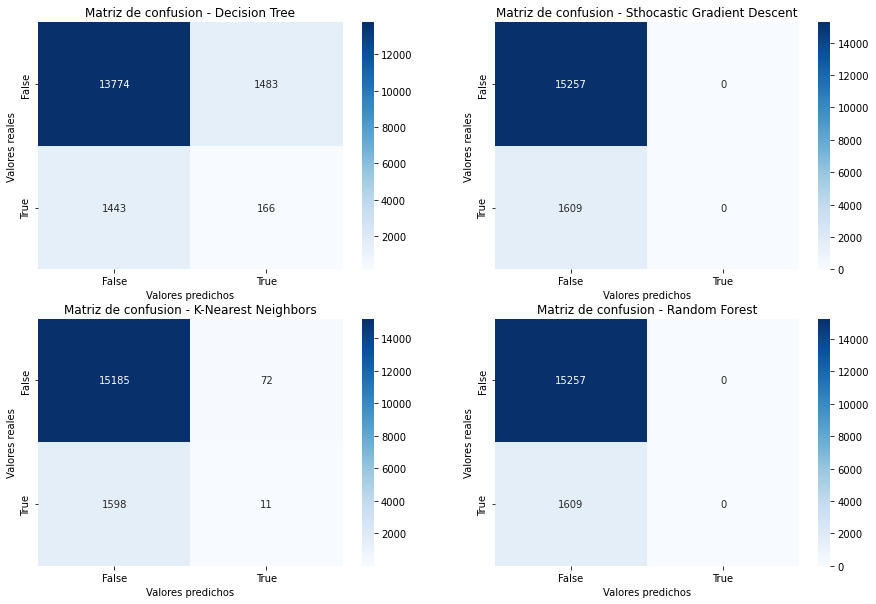

In [48]:
models = ({"Decision Tree":dt_pred, "Sthocastic Gradient Descent":sgd_pred,"K-Nearest Neighbors":knn_pred, "Random Forest":rdf_pred})

fig, axs = plt.subplots(2,2, figsize=(15,10))

i=0
for title, model in models.items():
    plt.subplot(2,2,i+1)
    cf_matrix(model, title)
    i +=1



En las matrices se ve que el Decision Tree parece ser el más confiable en esta instancia de pruebas iniciales aunque aún lejos de tener una buena performance.

In [49]:
metricas = pd.DataFrame(({'metricas':['recall', 'precision', 'accuracy', 'f1']}))

for model, pred in models.items():
    metricas[model] = [recall_score(y_test, pred), 
                        precision_score(y_test, pred),
                        accuracy_score(y_test, pred),
                        f1_score(y_test, pred)]

metricas

metricas  Decision Tree  Sthocastic Gradient Descent  K-Nearest Neighbors  \
0     recall           0.10                         0.00                 0.01   
1  precision           0.10                         0.00                 0.13   
2   accuracy           0.83                         0.90                 0.90   
3         f1           0.10                         0.00                 0.01   

   Random Forest  
0           0.00  
1           0.00  
2           0.90  
3           0.00

#### Conclusión
Finalmente la comparación numérica de las métricas confirma la percepción obtenida al mirar las matrices de confusión. En general los modelos etiquetan correctamente entre el 83% y el 90% de los casos, pero no logran niveles aceptables de especifidad y sensibilidad. De hecho el SGD y el Random forest, no predijeron ningún caso positivo.